# Predicting House Price

The dataset house sale prices for King County, Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold. It can be used to model house price prediction.

The dataset is available at kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

Some of the attributes that are captured in the dataset are

1. No of bedrooms and bathrooms
2. Total square feet of living 
3. How many floors
4. Wether it has a basement and size of the basement
5. Grade of the house 
6. Weather it has waterfront and the quality of the view
7. When the house was built and if the house is renovated, if it is renovated?
8. Latitude and longitude
9. price of the house
10. When the house was sold

#### Let's explore the dataset to understand these attributes and their characteristics in more detail

# Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
house_df = pd.read_csv('kc_house_data.csv')

In [5]:
house_df.head( 5 )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Unique Zipcodes

In [8]:
len(house_df.zipcode.unique())

70

# Exploratory Analysis

It is important to understand the properties of each variable including the target variable before actually creating a model to predict.

### Any missing values

In [9]:
house_df.isnull().any().sum()

0

In [10]:
#missing data
total = house_df.isnull().sum().sort_values(ascending=False)
total

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

In [11]:
percent = (house_df.isnull().sum()/house_df.count()).sort_values(ascending=False)

In [12]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
sqft_lot15,0,0.0
view,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


### Understanding distribution of price - target variable

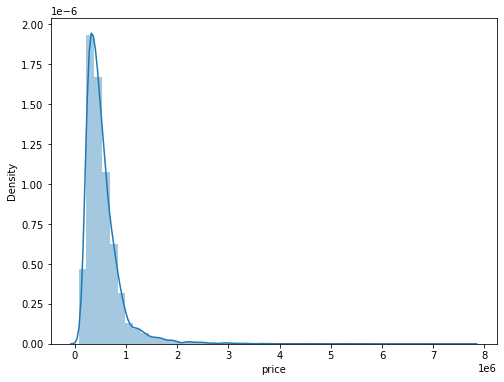

In [13]:
plt.figure(figsize=(8,6))
sn.distplot( house_df.price );

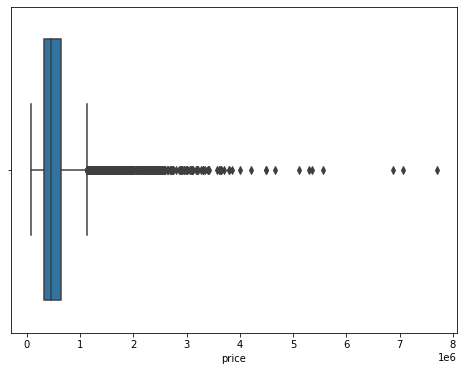

In [14]:
plt.figure(figsize=(8,6))
sn.boxplot( house_df.price );

#### Price is a highly skewed variable. Right skewed.

* Such variables can be tranformed using log tranformation, which might make the variable more normally distributed. 

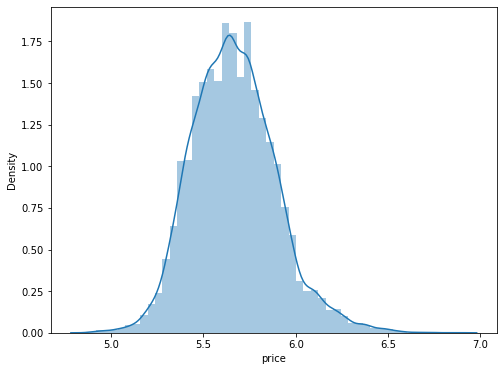

In [15]:
plt.figure(figsize=(8,6))
sn.distplot( np.log10( house_df.price ) );

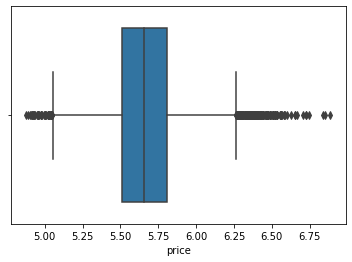

In [16]:
sn.boxplot( np.log10( house_df.price ) );

In [17]:
house_df['log_price'] = np.log10( house_df.price );

## How sqft_living is distributed?

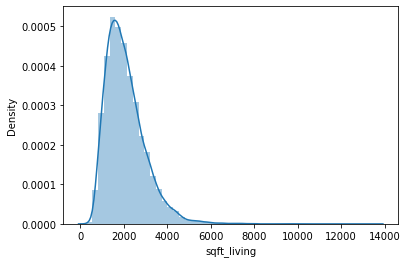

In [18]:
sn.distplot( house_df.sqft_living );

In [19]:
house_df.sqft_living.skew()

1.471555426802092

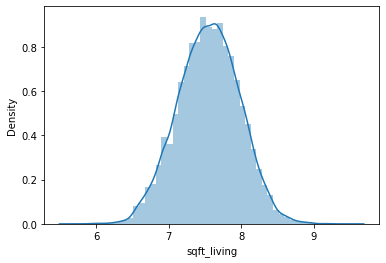

In [20]:
sn.distplot( np.log( house_df.sqft_living ) );

In [21]:
house_df['log_sqft_living'] = np.log( house_df.sqft_living );

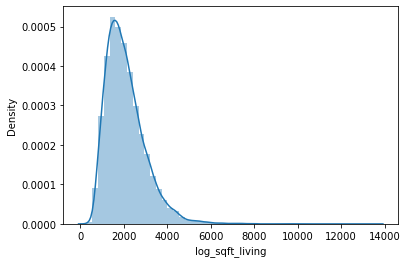

In [22]:
sn.distplot( np.exp( house_df.log_sqft_living ) );

In [23]:
from sklearn.preprocessing import PowerTransformer

In [24]:
boxcox_transformer = PowerTransformer(method='box-cox')

In [25]:
boxcox_transformer.fit(house_df[['sqft_living']])

PowerTransformer(method='box-cox')

In [26]:
house_df['boxcox_sqft_living'] = boxcox_transformer.transform(house_df[['sqft_living']])

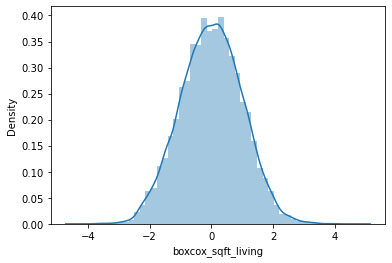

In [27]:
sn.distplot( house_df.boxcox_sqft_living );

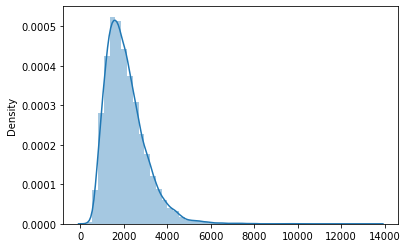

In [28]:
sn.distplot( boxcox_transformer.inverse_transform(house_df[['boxcox_sqft_living']]));

#### Note:

- What information you should looks for while doing this transformation?

### Negative Skewed Data

In [29]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues = 2000
maxValue = 10
skewness = -4.0   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

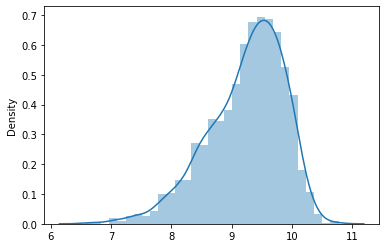

In [30]:
sn.distplot( random ) ;

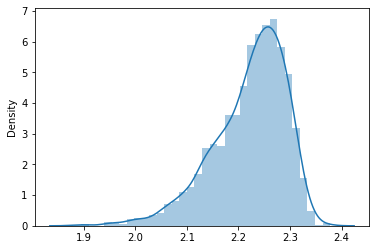

In [31]:
sn.distplot( np.log( random ) );

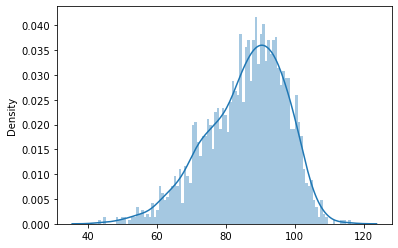

In [32]:
sn.distplot(np.power(random, 2.0), bins = 100);
## Do a power transformation

# Multi-collinearity

In [33]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'log_sqft_living', 'boxcox_sqft_living'],
      dtype='object')

In [34]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living',
                   'sqft_lot', 'sqft_above', 'sqft_basement', 
                   'sqft_living15', 'sqft_lot15', 'price']

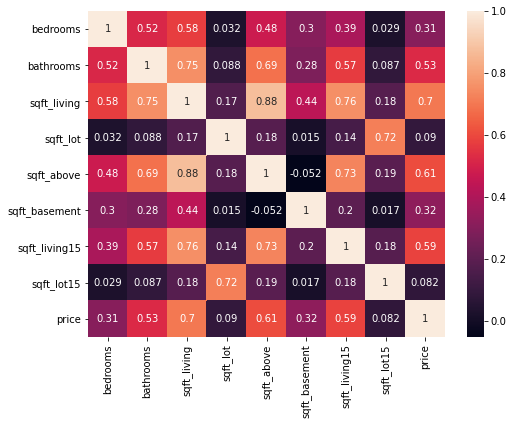

In [35]:
plt.figure(figsize=(8,6))
sn.heatmap( house_df[numerical_vars].corr(), annot=True);

#### Almost all variables are  correlated except sqft_lot and sqft_lot15.

- Price is highly correlated with sqft_living and sqft_above. 
- And moderately correlated with number of bathrooms, bedrooms and sqft_basement.
- sqft_living is highly correlated with sqft_above. We can choose one of the two variables as predictor. Because, sqft_living is highly correalted with price, we will choose the variable.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def get_vif_factors( X ):
    vif = [ variance_inflation_factor( X.values, i ) for i in range( X.values.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

In [38]:
numerical_vars.remove('price')

In [39]:
get_vif_factors( house_df[numerical_vars] )

,column,vif
0,bedrooms,13.324451
1,bathrooms,19.165341
2,sqft_living,inf
3,sqft_lot,2.358752
4,sqft_above,inf
5,sqft_basement,inf
6,sqft_living15,18.692029
7,sqft_lot15,2.560775


In [40]:
numerical_vars = ['bedrooms', 
                  'sqft_living',
                  'sqft_lot', 
                  'sqft_lot15']

In [41]:
get_vif_factors( house_df[numerical_vars] )

,column,vif
0,bedrooms,9.189979
1,sqft_living,9.604161
2,sqft_lot,2.352321
3,sqft_lot15,2.534157


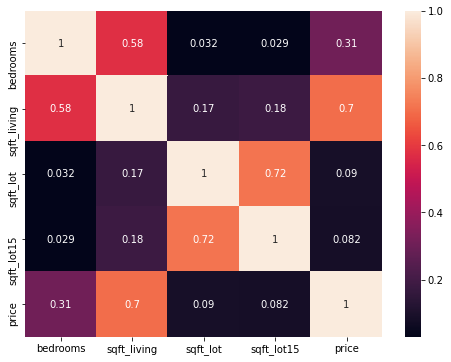

In [42]:
plt.figure(figsize=(8,6))
sn.heatmap( house_df[numerical_vars +['price']].corr(), annot=True);

## Creating New Variables

Sometimes that variables present in the dataset can be used as it is. And we may need to derive variables from the datasets. For example, the year in which the house is built. It is not a continuous variable and if we use it as a categorical variable, it will create several categories. And there might not have much information about the categories. But what we can do it, we can calcuate the **age** of the house, when it is sold by calculating the difference between the year it is sold and the year it is built.

### Age of the house

In [43]:
house_df['age'] = house_df.apply( lambda rec: int( rec.date[0:4] ) - rec.yr_built, axis = 1 )

In [44]:
house_df[['yr_built', 'date', 'age']][0:5]

,yr_built,date,age
0,1955,20141013T000000,59
1,1951,20141209T000000,63
2,1933,20150225T000000,82
3,1965,20141209T000000,49
4,1987,20150218T000000,28


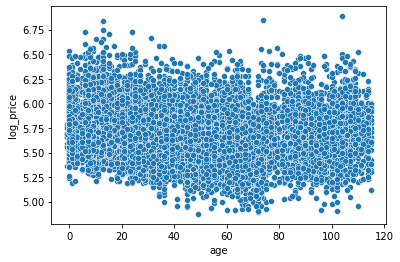

In [45]:
sn.scatterplot(data = house_df, x = 'age', y = 'log_price');

## Encoding ZipCode

In [46]:
zipcode_dummies = pd.get_dummies(house_df['zipcode'], 
                                 columns = 'zipcode')

In [47]:
zipcode_dummies.shape

(21613, 70)

In [48]:
zipcode_dummies

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.feature_extraction import FeatureHasher

In [50]:
h = FeatureHasher(n_features=20, 
                  input_type = 'string')

In [51]:
house_df['zipcode_str'] = house_df['zipcode'].astype(str)

In [52]:
zipcode_hashes = h.transform(house_df['zipcode_str'])

In [53]:
pd.DataFrame(zipcode_hashes.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
21609,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
21610,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0
21611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering features

In [54]:
house_df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_living,boxcox_sqft_living,age,zipcode_str
609,5631500868,20150417T000000,590000.0,4,3.50,3100,15842,2.0,0,0,...,98028,47.7466,-122.242,2200,19400,5.770852,8.039157,1.152838,19,98028
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,98166,47.4643,-122.368,2810,33190,5.903090,8.919988,3.282122,61,98166
9056,3625059166,20150107T000000,553000.0,3,1.00,1310,18135,1.0,0,0,...,98008,47.6065,-122.113,2150,18135,5.742725,7.177782,-0.878515,67,98008
8254,5250300035,20141008T000000,910000.0,4,1.50,2890,9000,2.0,0,4,...,98118,47.5682,-122.274,2550,8400,5.959041,7.969012,0.985550,75,98118
7911,1051000040,20150424T000000,1824100.0,3,2.25,3330,20053,2.0,0,0,...,98004,47.6395,-122.214,2870,20053,6.261049,8.110728,1.323867,47,98004
1551,7203000465,20141018T000000,245000.0,3,2.00,1450,9333,2.0,0,0,...,98003,47.3460,-122.315,1910,7701,5.389166,7.279319,-0.641641,42,98003
13337,8929000040,20140820T000000,462608.0,3,2.50,2010,2778,2.0,0,0,...,98029,47.5528,-121.999,1540,1689,5.665213,7.605890,0.124864,0,98029
11303,6127010890,20150427T000000,663000.0,4,2.50,3570,6246,2.0,0,0,...,98075,47.5927,-122.006,2260,5231,5.821514,8.180321,1.490505,10,98075
13541,3630110220,20141012T000000,785000.0,4,2.50,2960,4750,2.0,0,0,...,98029,47.5544,-121.993,2960,4750,5.894870,7.992945,1.042589,9,98029
4762,9201300050,20140814T000000,1850000.0,5,2.25,2800,8442,2.0,1,4,...,98075,47.5784,-122.076,3220,9156,6.267172,7.937375,0.910209,51,98075


In [55]:
house_df[['lat', 'long']]

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21608,47.6993,-122.346
21609,47.5107,-122.362
21610,47.5944,-122.299
21611,47.5345,-122.069


In [62]:
from sklearn.cluster import DBSCAN

In [97]:
kms_per_radian = 6371.0
epsilon = 1.5/ kms_per_radian

coords = house_df[['lat', 'long']]

db = DBSCAN(eps=epsilon, 
            min_samples=100, 
            algorithm='ball_tree', 
            metric='haversine').fit(np.radians(coords))

In [98]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 18


In [99]:
house_df[['neighbor']] = cluster_labels = db.labels_

In [100]:
house_df.neighbor.value_counts()

 0     8080
 4     3343
-1     2949
 1     2163
 5     1149
 2     1078
 3      858
 6      305
 14     288
 8      250
 12     176
 16     161
 9      161
 10     154
 7      148
 13     128
 11     113
 15     109
Name: neighbor, dtype: int64